# 시계열 데이터 특성

시계열 데이터는 몇가지 속성들을 가지고 있는데 그림을 통해 그것들을 알아보고 중요 용어를 정리합니다.
* Trends
* Seasonality
* Cyclical

### Trends - 트렌드

그래프가 계속 올라가거나 유지되거나 내려가는 경향을 보이는 것을 Trends라고 한다.
* Upward
* Horizontal/Stationary
* Downward

### Seasonality - 반복되는 트렌드

long term

short term

보통 최소 3번정도 반복되는 패턴이 있다면 Seasonality가 있다고 한다.

패턴이 많이 발생해야지 Seasonality가 강한 것이다.

### Cyclical - 일정하지 않은 기간의 트렌드

패턴이긴 하지만 long term 트렌드 이다.

# ETS 모델

* 데이터의 패턴을 더 잘 파악하기 위해서 또는 예측을 수행하기 위해 Smoothing을 합니다.

* Smoothing 위해서 Error, Trend, Seasonality 요소들을 활용하는데, 각각을 더하거나 곱하여 Smoothing을 합니다.

* 또한 이것들을 가지고 시계열 데이터를 모델링 할 수 있습니다.

### ETS Decomposition
* ETS 컴포넌트들을 시각화 하는 것은 데이터의 흐름을 이해하는 데 큰 도움이 됩니다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### model='additive'

y_t = Error + Trend + Seasonality

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
series = pd.Series([i+np.random.randint(10) for i in range(1,100)])

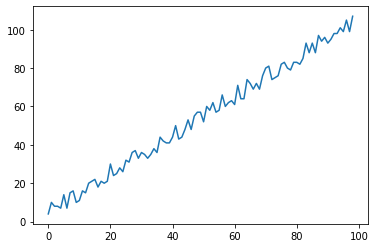

In [ ]:
series.plot()

In [ ]:
result = seasonal_decompose(series, model='additive', freq=1)

In [ ]:
result

In [ ]:
result.resid

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
94    0.0
95    0.0
96    0.0
97    0.0
98    0.0
Length: 99, dtype: float64

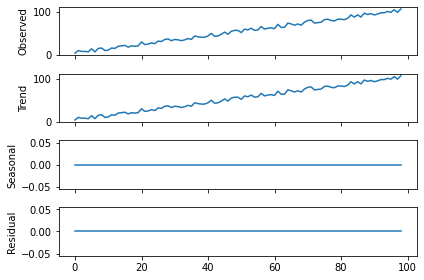

In [ ]:
result.plot();

In [ ]:
def plot_decompose(decomposeresult):
  fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,8)) # 서브플롯 4개를 그리고 1개의 figure에 나타내어라
  decomposeresult.observed.plot(legend=False, ax=ax1)
  ax1.set_ylabel('Observerd')
  decomposeresult.trend.plot(legend=False, ax=ax2)
  ax2.set_ylabel('Trend')
  decomposeresult.seasonal.plot(legend=False, ax=ax3)
  ax3.set_ylabel('Seasonal')
  decomposeresult.resid.plot(legend=False, ax=ax4)
  ax4.set_ylabel('Resid')

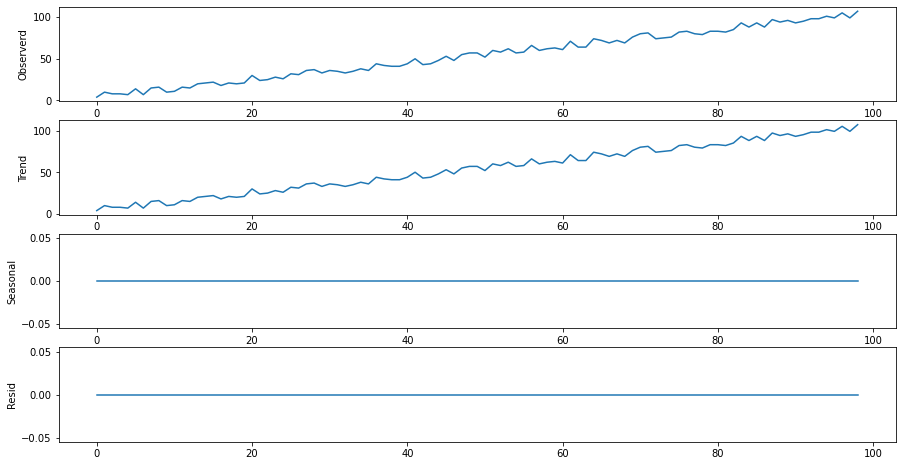

In [ ]:
plot_decompose(result)

### model='multiplicative'

y_t = Level(Cyclical) * Error * Trend * Seasonality

In [ ]:
series = pd.Series([i**2 for i in range(1,100)])

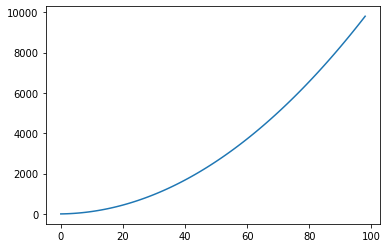

In [ ]:
series.plot()

In [ ]:
result = seasonal_decompose(series, model='multiplicative', freq=1)

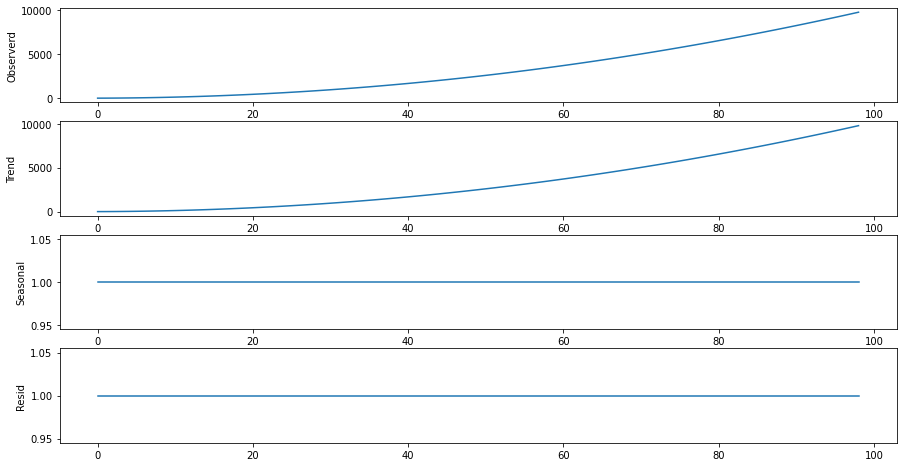

In [ ]:
plot_decompose(result)

In [ ]:
airline = \
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tacademy_timeseries/airline_passengers.csv',
            index_col='Month')

In [ ]:
airline.head()

,Thousands of Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


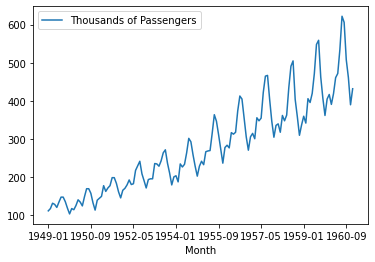

In [ ]:
airline.plot()
# 월별 passenger 수가 상향 트렌드로 보여지면서 똑같은 패턴으로 annually(매년) 반복되는 걸 볼 수 있다.
# >>> Seasonality를 갖고있다고 할 수 있다.
# >>> 약간 직선인 듯 곡선인 듯 보인다.
# >>> multiplicative 모델로 decompose를 해도 문제가 없을 것이다.

In [ ]:
airline.index = pd.to_datetime(airline.index)

In [ ]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
result = \
seasonal_decompose(airline['Thousands of Passengers'],
                   model='multiplicative')

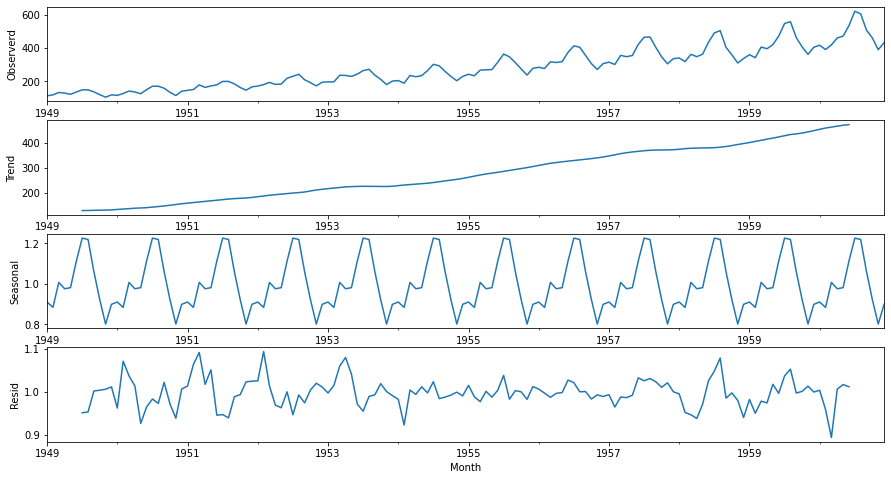

In [ ]:
plot_decompose(result)

### 우리가 시계열 데이터를 분석하고 모델링한다는 것은

* Trend를 제거하고

* Seasonality를 뺀 다음에

* Noise에서 패턴을 얻어다가 모델링한다.

### 다시 Prediction(예측)할 때에는

* 모델링된 것에다가 Seasonality를 더해주고

* Trend를 더하는 방식으로 한다.